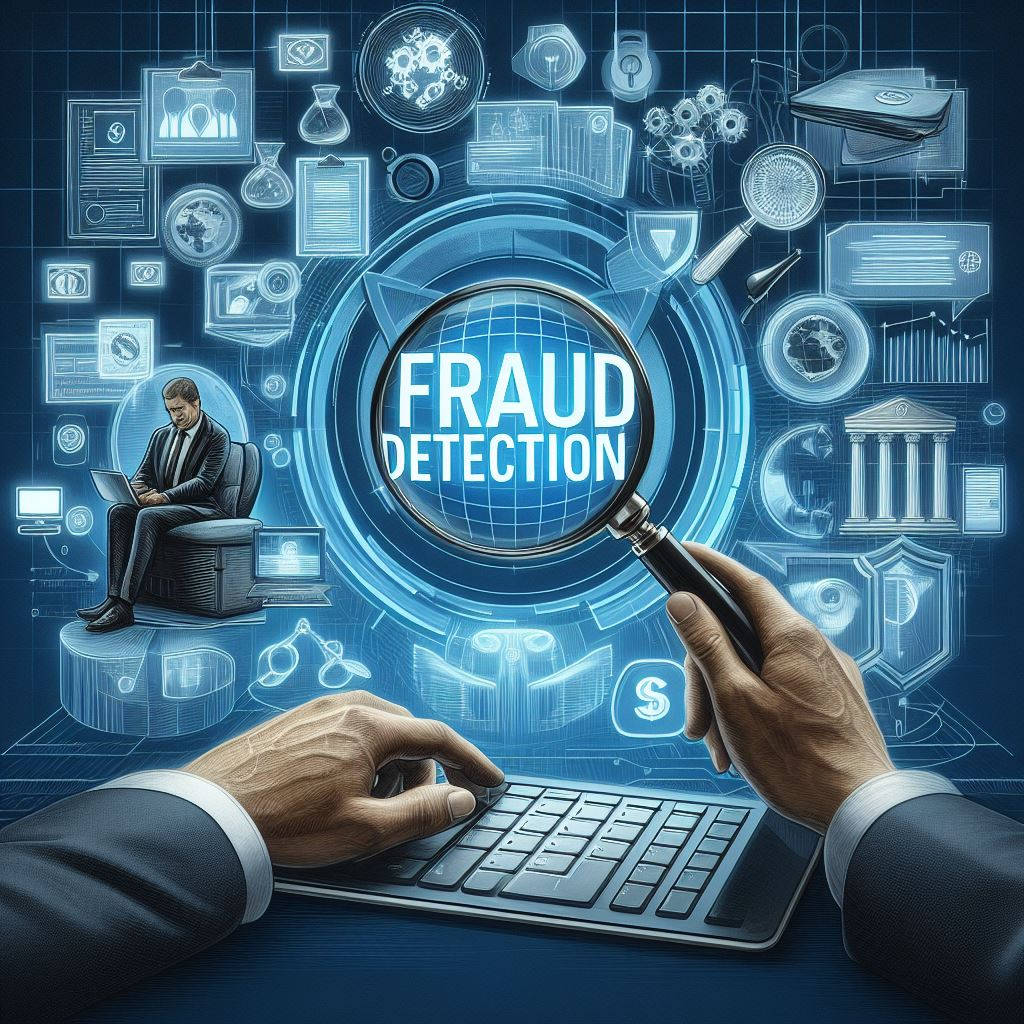

<font color='red'><b>Problem Statement</b></font>

<b><font color='black'>Developing a fraud detection model using historical transaction data is crucial for maintaining the security and integrity of financial transactions. The dataset provided contains various features such as transaction details, device information, and user characteristics. The goal is to predict whether a transaction is fraudulent or not, making this a binary classification problem.</font><b>


<font color='green'><b>Data Dictionary:</b></font>

1. <b>TransactionKey:</b> Unique identifier for each transaction.
2. <b>ConnectionRegion:</b> Geographical region of the connection.
3. <b>V1CF, V2CF, V3CF, V4CF, V5CF, V6CF:</b> Various numerical features related to the transaction.
4. <b>TimeZone:</b> Time zone associated with the transaction.
5. <b>AreaCode:</b> Area code associated with the transaction.
6. <b>ConnectionOrg:</b> Organization or company associated with the connection.
7. <b>ConnectionType:</b> Type of connection, such as cable or DSL.
8. <b>ConnectionSpeed:</b> Speed of the connection.
9. <b>channel:</b> Communication channel used for the transaction.
10. <b>TransactionDateTime:</b> Date and time of the transaction.
11. <b>AddressUpdateDate:</b> Date when the address was last updated.
12. <b>EmailUpdateDate:</b> Date when the email was last updated.
13. <b>webSessOS:</b> Operating system used for the web session.
14. <b>webSessWebBrowser:</b> Web browser used for the web session.
15. <b>LastLong, LastLat:</b> Longitude and latitude coordinates related to the last location.
16. <b>CurrentLong, CurrentLat:</b> Longitude and latitude coordinates related to the current location.
17. <b>IsOldDevice:</b> Binary indicator for whether the device is old or not.
18. <b>WebSessionRetail:</b> Information related to retail during the web session.
19. <b>MainEntityUse:</b> Main entity using the connection.
20. <b>Fraud:</b> Binary target variable indicating whether the transaction is fraudulent (1) or not (0).


In [1]:
# Importing warnings library to handle warnings
import warnings

# Ignoring any warning messages
warnings.filterwarnings("ignore")

# Importing pandas for data manipulation
import pandas as pd

# Importing numpy for numerical operations
import numpy as np

# Importing matplotlib for basic plotting
import matplotlib.pyplot as plt

# Importing seaborn for advanced data visualization
import seaborn as sns


In [2]:
# Setting the file path to the dataset
path = "/content/drive/MyDrive/Datasets/MyBank.csv"

# Loading the dataset into a DataFrame 'df' using pandas
df = pd.read_csv(path)

In [3]:
# Displaying the first few rows of the DataFrame 'df'
df.head()

,TransactionKey,ConnectionRegion,V1CF,V2CF,V3CF,V4CF,V5CF,TimeZone,AreaCode,ConnectionOrg,...,webSessOS,webSessWebBrowser,LastLong,LastLat,CurrentLong,CurrentLat,IsOldDevice,WebSessionRetail,MainEntityUse,Fraud
0,16758,south central@texas@us,99,98,10,803,19820,-5.0,602.0,013 netvision fix ip users,...,Mac OS X,Chrome,-108.5530,NaN,9.4400,NaN,0.0,0.0,NaN,0
1,8912,northeast@new york@us,99,94,61,602,16980,-4.0,512.0,013 netvision fix ip users,...,Windows 7,Edge,-121.8382,27.9860,-112.0826,33.7985,0.0,0.0,315.0,0
2,92186,mid atlantic@new jersey@us,76,95,66,505,35620,-6.0,407.0,013 netvision fix ip users,...,Windows 7,Mobile Safari,-74.0734,33.7985,-80.3120,32.8494,1.0,NaN,333.0,0
3,12924,south central@arkansas@us,99,23,50,0,35620,-5.0,202.0,013 netvision fix ip users,...,Windows 7,Mobile Safari,-88.1029,27.9860,-84.3883,42.1530,1.0,0.0,327.0,0
4,125650,mid atlantic@new jersey@us,99,74,80,602,19100,-8.0,313.0,013 netvision fix ip users,...,Windows 7,Chrome,-58.5244,34.9497,-111.3270,34.0476,1.0,0.0,394.0,0


In [4]:
# Displaying the last few rows of the DataFrame 'df'
df.tail()

,TransactionKey,ConnectionRegion,V1CF,V2CF,V3CF,V4CF,V5CF,TimeZone,AreaCode,ConnectionOrg,...,webSessOS,webSessWebBrowser,LastLong,LastLat,CurrentLong,CurrentLat,IsOldDevice,WebSessionRetail,MainEntityUse,Fraud
138747,4918,southwest@california@us,86,85,80,602,0,-6.0,630.0,zynga corp.,...,iOS,Chrome,-66.9200,40.7589,-119.1831,34.0526,1.0,0.0,406.0,0
138748,117775,southeast@georgia@us,99,97,90,527,41860,-8.0,630.0,zynga corp.,...,Mac OS X,Chrome,-89.9481,40.7589,-74.1945,40.7387,1.0,0.0,360.0,0
138749,70441,great lakes@ohio@us,99,88,90,618,12420,-5.0,212.0,zynga corp.,...,Mac OS X,Chrome,-81.2526,40.9526,-77.2718,40.7589,1.0,0.0,240.0,0
138750,127115,great lakes@illinois@us,99,23,23,819,16980,-6.0,704.0,zynga corp.,...,Windows 7,Chrome,-73.7644,42.3976,-117.7899,41.8488,NaN,0.0,395.0,0
138751,40331,southeast@georgia@us,99,63,50,501,19100,-5.0,305.0,zynga corp.,...,Windows 7,Mobile Safari,-104.9856,33.9535,-82.9995,33.7985,1.0,0.0,293.0,0


In [5]:
# Displaying information about the DataFrame 'df', including data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138752 entries, 0 to 138751
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TransactionKey       138752 non-null  int64  
 1   ConnectionRegion     138752 non-null  object 
 2   V1CF                 138752 non-null  int64  
 3   V2CF                 138752 non-null  int64  
 4   V3CF                 138752 non-null  int64  
 5   V4CF                 138752 non-null  int64  
 6   V5CF                 138752 non-null  int64  
 7   TimeZone             138752 non-null  float64
 8   AreaCode             138740 non-null  float64
 9   ConnectionOrg        138752 non-null  object 
 10  ConnectionType       138752 non-null  object 
 11  ConnectionSpeed      138752 non-null  object 
 12  V6CF                 138752 non-null  object 
 13  channel              138752 non-null  object 
 14  TransactionDateTime  138752 non-null  object 
 15  AddressUpdateDate

In [6]:
# Calculating the number of missing values in each column of the DataFrame 'df'
df.isnull().sum()

TransactionKey             0
ConnectionRegion           0
V1CF                       0
V2CF                       0
V3CF                       0
V4CF                       0
V5CF                       0
TimeZone                   0
AreaCode                  12
ConnectionOrg              0
ConnectionType             0
ConnectionSpeed            0
V6CF                       0
channel                    0
TransactionDateTime        0
AddressUpdateDate          0
EmailUpdateDate            0
webSessOS                  0
webSessWebBrowser          0
LastLong               24389
LastLat                24231
CurrentLong                0
CurrentLat             24379
IsOldDevice             4070
WebSessionRetail        4038
MainEntityUse           4080
Fraud                      0
dtype: int64

<font color='green'><b>Insights:</b></font>

- <b>'TransactionKey'</b>, <b>'ConnectionRegion'</b>, <b>'V1CF'</b>, <b>'V2CF'</b>, <b>'V3CF'</b>, <b>'V4CF'</b>, <b>'V5CF'</b>, <b>'TimeZone'</b>, <b>'ConnectionOrg'</b>, <b>'ConnectionType'</b>, <b>'ConnectionSpeed'</b>, <b>'V6CF'</b>, <b>'channel'</b>, <b>'TransactionDateTime'</b>, <b>'AddressUpdateDate'</b>, <b>'EmailUpdateDate'</b>, <b>'webSessOS'</b>, <b>'webSessWebBrowser'</b>, <b>'CurrentLong'</b>, and <b>'Fraud'</b> columns have no missing values.
- <b>'AreaCode'</b> column has 12 missing values.
- <b>'LastLong'</b> column has 24,389 missing values.
- <b>'LastLat'</b> column has 24,231 missing values.
- <b>'CurrentLat'</b> column has 24,379 missing values.
- <b>'IsOldDevice'</b> column has 4,070 missing values.
- <b>'WebSessionRetail'</b> column has 4,038 missing values.
- <b>'MainEntityUse'</b> column has 4,080 missing values.

<b>We will handle the missing values later.<b>


In [7]:
# Generating descriptive statistics summary for numerical columns in the DataFrame 'df'
df.describe()

,TransactionKey,V1CF,V2CF,V3CF,V4CF,V5CF,TimeZone,AreaCode,LastLong,LastLat,CurrentLong,CurrentLat,IsOldDevice,WebSessionRetail,MainEntityUse,Fraud
count,138752.000000,138752.000000,138752.000000,138752.000000,138752.000000,138752.000000,138752.000000,138740.000000,114363.000000,114521.000000,138752.000000,114373.000000,134682.000000,134714.0,134672.000000,138752.000000
mean,69376.500000,95.532252,78.871541,69.438386,600.997341,27842.709438,-5.810414,494.512332,-89.669418,36.763389,-89.470605,36.784544,0.816041,0.0,350.964573,0.028562
std,40054.396613,8.171424,25.561483,23.239424,173.488234,11612.998102,5.766666,263.428397,29.563767,7.229397,30.108608,7.065221,0.387452,0.0,88.997318,0.166572
min,1.000000,40.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000,-175.200000,-43.532100,-159.469200,-43.532100,0.000000,0.0,0.000000,0.000000
25%,34688.750000,99.000000,80.000000,66.000000,505.000000,16980.000000,-7.000000,305.000000,-112.082600,33.690300,-112.082600,33.690300,1.000000,0.0,313.000000,0.000000
50%,69376.500000,99.000000,88.000000,77.000000,602.000000,31100.000000,-6.000000,415.000000,-87.671200,38.952000,-87.671200,38.960000,1.000000,0.0,373.000000,0.000000
75%,104064.250000,99.000000,95.000000,80.000000,753.000000,35620.000000,-5.000000,713.000000,-77.878600,41.074100,-77.342500,41.086000,1.000000,0.0,395.000000,0.000000
max,138752.000000,99.000000,99.000000,99.000000,881.000000,49780.000000,999.000000,979.000000,178.458900,65.000000,178.458900,64.832000,1.000000,0.0,620.000000,1.000000


In [8]:
# Generating descriptive statistics summary for categorical (object-type) columns in the DataFrame 'df'
df.describe(include="object")

,ConnectionRegion,ConnectionOrg,ConnectionType,ConnectionSpeed,V6CF,channel,TransactionDateTime,AddressUpdateDate,EmailUpdateDate,webSessOS,webSessWebBrowser
count,138752,138752,138752,138752,138752,138752,138752,138752,138752,138752,138752
unique,500,7620,11,4,231,4,82445,66794,66917,20,23
top,southwest@california@us,time warner cable internet llc,cable,medium,net,SOA,31/05/2013 12:21:33:000,20/01/2004 03:26:16:000,20/01/2004 02:45:44:000,Windows 10,Chrome
freq,26098,15676,70047,92827,74018,71956,11,9820,6289,36042,64624


<font color='green'><b>Insights:</b></font>

<font color='black'><b>ConnectionRegion:</b></font>
- There are 500 unique regions in the dataset.
- The most frequent region is 'southwest@california@us' with 26,098 occurrences.

<font color='black'><b>ConnectionOrg:</b></font>
- There are 7,620 unique organizations in the dataset.
- The most frequent organization is 'time warner cable internet llc' with 15,676 occurrences.

<font color='black'><b>ConnectionType:</b></font>
- There are 11 unique types of connections.
- The most common connection type is 'cable' with 70,047 occurrences.

<font color='black'><b>ConnectionSpeed:</b></font>
- There are 4 unique speed categories.
- The majority of connections have a speed categorized as 'medium', occurring 92,827 times.

<font color='black'><b>V6CF:</b></font>
- There are 231 unique values for V6CF.
- The most frequent value is 'net', appearing 74,018 times.

<font color='black'><b>channel:</b></font>
- There are 4 unique channels.
- The most frequent channel is 'SOA' with 71,956 occurrences.

<font color='black'><b>webSessOS:</b></font>
- There are 20 unique operating systems for web sessions.
- The most frequent operating system is 'Windows 10' with 36,042 occurrences.

<font color='black'><b>webSessWebBrowser:</b></font>
- There are 23 unique web browsers for web sessions.
- The most frequent web browser is 'Chrome' with 64,624 occurrences.


In [9]:
# Get the number of unique values in each column of the DataFrame 'df'
df_nunique = df.nunique()

# Display the summary
print(df_nunique)

TransactionKey         138752
ConnectionRegion          500
V1CF                        9
V2CF                       29
V3CF                       23
V4CF                      207
V5CF                      582
TimeZone                   27
AreaCode                  243
ConnectionOrg            7620
ConnectionType             11
ConnectionSpeed             4
V6CF                      231
channel                     4
TransactionDateTime     82445
AddressUpdateDate       66794
EmailUpdateDate         66917
webSessOS                  20
webSessWebBrowser          23
LastLong                 3160
LastLat                  3117
CurrentLong              3603
CurrentLat               3073
IsOldDevice                 2
WebSessionRetail            1
MainEntityUse             579
Fraud                       2
dtype: int64


**Lets Explore the Target Variable**

In [10]:
df["Fraud"].value_counts()

0    134789
1      3963
Name: Fraud, dtype: int64

In [11]:
# Count of 0 and 1 in the 'Fraud' column
count_0 = 134789
count_1 = 3963

# Total count of values in the 'Fraud' column
total_count = count_0 + count_1

# Percentage of 0 and 1
percentage_0 = (count_0 / total_count) * 100
percentage_1 = (count_1 / total_count) * 100

print("Percentage of 0:", percentage_0)
print("Percentage of 1:", percentage_1)


Percentage of 0: 97.14382495387454
Percentage of 1: 2.856175046125461


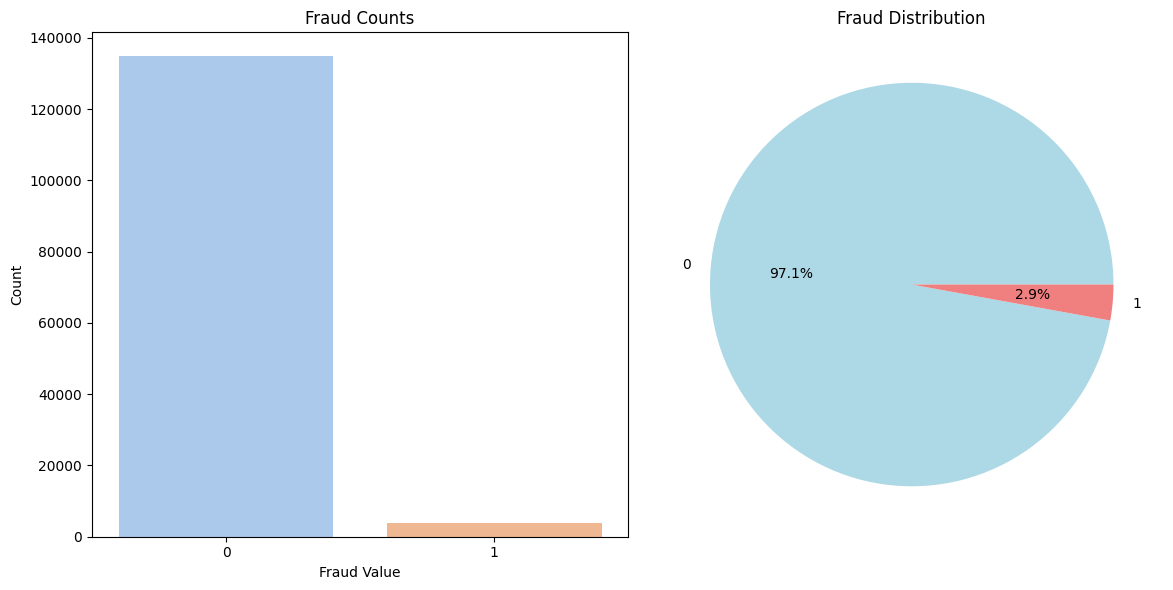

In [12]:
# Count of each unique value in the 'Fraud' column
fraud_counts = df['Fraud'].value_counts()

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, ax=axes[0], palette='pastel')
axes[0].set_title('Fraud Counts')
axes[0].set_xlabel('Fraud Value')
axes[0].set_ylabel('Count')

# Pie chart
axes[1].pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
axes[1].set_title('Fraud Distribution')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


<font color='blue'><b>Data Imbalance:</b></font>
<b>
- Approximately 97.14% of the transactions are labeled as '0', indicating non-fraudulent transactions.
- Approximately 2.86% of the transactions are labeled as '1', indicating fraudulent transactions.

This shows that the data is highly imbalanced.</b>


<font color='red'><b>Dropping the following columns:</b></font>

1. <b>TransactionKey:</b>
   - <b>Reason for Dropping:</b> This column serves as a unique identifier for each transaction but doesn't directly contribute to fraud detection. Removing it streamlines the dataset and reduces complexity.

2. <b>TimeZone:</b>
   - <b>Reason for Dropping:</b> The timezone information is unlikely to be relevant for fraud detection.

3. <b>LastLong, LastLat, CurrentLong, CurrentLat:</b>
   - <b>Reason for Dropping:</b> These columns contain geographical coordinates have missing values and may not directly impact fraud detection. Their removal reduces redundancy and complexity in the dataset.

4. <b>WebSessionRetail:</b>
   - <b>Reason for Dropping:</b> This column has a constant value of '0.0' for all records, providing no meaningful variability. Removing it simplifies the dataset without losing important information for fraud detection.


In [13]:
columns_to_drop = ['TransactionKey', 'TimeZone', 'LastLong', 'LastLat', 'CurrentLong', 'CurrentLat', 'WebSessionRetail']
# Dropping the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

In [14]:
# Verifying if the columns have been dropped
df.columns

Index(['ConnectionRegion', 'V1CF', 'V2CF', 'V3CF', 'V4CF', 'V5CF', 'AreaCode',
       'ConnectionOrg', 'ConnectionType', 'ConnectionSpeed', 'V6CF', 'channel',
       'TransactionDateTime', 'AddressUpdateDate', 'EmailUpdateDate',
       'webSessOS', 'webSessWebBrowser', 'IsOldDevice', 'MainEntityUse',
       'Fraud'],
      dtype='object')

In [15]:
# Checking for unique values in ConnectionRegion
df["ConnectionRegion"].unique()

array(['south central@texas@us', 'northeast@new york@us',
       'mid atlantic@new jersey@us', 'south central@arkansas@us',
       'southeast@north carolina@us', 'great lakes@illinois@us',
       'southwest@california@us', 'south central@louisiana@us',
       'southeast@florida@us', 'mid atlantic@district of columbia@us',
       'great lakes@ohio@us', 'northeast@massachusetts@us',
       'mountain@new mexico@us', 'southeast@georgia@us',
       'unknown@distrito capital@ve', 'london@greater london@gb',
       'southwest@arizona@us', 'midwest@indiana@us',
       'mid atlantic@virginia@us', 'unknown@michoacan de ocampo@mx',
       'great lakes@michigan@us', 'unknown@guatemala@gt',
       'cagayan valley@isabela@ph', 'southeast@mississippi@us',
       'mountain@utah@us', 'south central@missouri@us',
       'unknown@distrito nacional@do', 'mountain@colorado@us',
       'great lakes@wisconsin@us', 'unknown@baden-wuerttemberg@de',
       'pacific northwest@washington@us', 'mid atlantic@pennsy


<b>We split the 'ConnectionRegion' column into separate columns for 'Area', 'State', and 'Country' to extract and organize geographical information for improved analysis and interpretation.</b>

In [16]:
# Splitting the 'ConnectionRegion' column
df[['Area', 'State', 'Country']] = df['ConnectionRegion'].str.split('@', expand=True)


In [17]:
# Drop the 'ConnectionRegion' column
df = df.drop(columns=['ConnectionRegion'])

In [18]:
# Count occurrences of 'unknown' and 'none' in the 'Area' column
unknown_count_area = df[df['Area'] == 'unknown'].shape[0]  # Count occurrences of 'unknown' in the 'Area' column
none_count_area = df[df['Area'] == 'none'].shape[0]        # Count occurrences of 'none' in the 'Area' column

# Print the counts for the 'Area' column
print("Occurrences of 'unknown' in 'Area' column:", unknown_count_area)
print("Occurrences of 'none' in 'Area' column:", none_count_area)

# Count occurrences of 'unknown' and 'none' in the 'State' column
unknown_count_state = df[df['State'] == 'unknown'].shape[0]  # Count occurrences of 'unknown' in the 'State' column
none_count_state = df[df['State'] == 'none'].shape[0]        # Count occurrences of 'none' in the 'State' column

# Print the counts for the 'State' column
print("Occurrences of 'unknown' in 'State' column:", unknown_count_state)
print("Occurrences of 'none' in 'State' column:", none_count_state)

# Count occurrences of 'unknown' and 'none' in the 'Country' column
unknown_count_country = df[df['Country'] == 'unknown'].shape[0]  # Count occurrences of 'unknown' in the 'Country' column
none_count_country = df[df['Country'] == 'none'].shape[0]        # Count occurrences of 'none' in the 'Country' column

# Print the counts for the 'Country' column
print("Occurrences of 'unknown' in 'Country' column:", unknown_count_country)
print("Occurrences of 'none' in 'Country' column:", none_count_country)


Occurrences of 'unknown' in 'Area' column: 4782
Occurrences of 'none' in 'Area' column: 0
Occurrences of 'unknown' in 'State' column: 86
Occurrences of 'none' in 'State' column: 268
Occurrences of 'unknown' in 'Country' column: 0
Occurrences of 'none' in 'Country' column: 0


In [19]:
# Drop the 'State' and 'Area' columns from the DataFrame
df.drop(columns=['State', 'Area'], inplace=True)


<b>The decision to remove the 'State' and 'Area' columns was based on challenges in accurately filling missing values. Despite efforts to use common values from grouped data, it was found that the data didn't neatly fall into distinct groups, making further analysis difficult. Therefore, removing these columns maintains simplicity and accuracy in the dataset, ensuring reliable and straightforward analyses.<b>

In [20]:
# Check for missing values in the 'AreaCode' column
missing_values_count = df['AreaCode'].isnull().sum()

# Check for occurrences of "0" in the 'AreaCode' column
zero_count = (df['AreaCode'] == 0).sum()

# Print the results
print("Missing values count in 'AreaCode' column:", missing_values_count)
print("Occurrences of '0' in 'AreaCode' column:", zero_count)


Missing values count in 'AreaCode' column: 12
Occurrences of '0' in 'AreaCode' column: 5584


In [21]:
# Replace missing values in the 'AreaCode' column with 0
df['AreaCode'].fillna(0, inplace=True)


<b>Filling missing values in the 'AreaCode' column with 0 rather than mode  makes sense as it indicates the absence of a specific area code and maintains data consistency.<b>

In [22]:
# Check unique values in the 'ConnectionOrg' column
unique_values = df['ConnectionOrg'].unique()

# Print the unique values
print("Unique values in 'ConnectionOrg' column:")
for value in unique_values:
    print(value)


Streaming output truncated to the last 5000 lines.
foods midwest
foods peer
foothill-deanza community college district
foothills rural telephone cooperative corporation  inc.
for abc igw
for residential cable and xdsl subscribers
forbes media
forcepoint cloud india
ford foundation
ford motor company
fordham university
foresee results
foresite management  inc
forest hill med rlty
forest laboratories  inc.
forest park school district no. 91
forethought.net
forever 21
forex capital markets l.l.c.
forlaget systime
formatix corp
former zao mtu-intel
forsythe data centers
forsythe data centers inc.
forsythe technology inc
fort bend independent school dist.
forterra
fortis clearing chicago llc
fortress investment group llc
fortune fish
fortune international ltd.
fossil industries
four points by sheraton
four seasons design  inc.
fox entertainment group  inc.
fox news channel
fox valley internet
fox vending inc
foxconn corporation
fpg jpm texas management and owner c/o fortis property group
fp

In [23]:
# Sort the index
df.sort_index(inplace=True)

# Keep only the first characters before space in the 'ConnectionOrg' column
df['ConnectionOrg'] = df['ConnectionOrg'].str.split().str[0]


<b>Grouping by the first word of the 'ConnectionOrg' column consolidates many unique values into broader categories, simplifying the dataset.<b>

In [24]:
# Check unique values in the 'ConnectionOrg' column
unique_values = df['ConnectionOrg'].unique()

# Print the unique values
print("Unique values in 'ConnectionOrg' column:")
for value in unique_values:
    print(value)

Streaming output truncated to the last 5000 lines.
2g/3g/4g
2nd
309
33603185
3900
3bb
3g
3rd
3uk
525
555
5601
5nines
5th
702
75
754th
830
8x8
a
a.
a.c.
a.g.
a.i.
aa
aaa
aag
aapt
ab
abacoa
abacus
abbotswood
abbott
abbvie
abc
abcom-business-clients
abelman
abercrombie
able
abm
about.com
abraham
abss
abts
abu
academy
acadia
acc
acc-4info
acc-636
acc-a.o.
acc-agron
acc-apex
acc-apple
acc-architectural
acc-atrium
acc-awh
acc-bailey
acc-burns
acc-casita
acc-ccc
acc-cheddars
acc-covenant
acc-docusign
accelerize
accenture
accertify
access
acc-fh
acc-frn
acc-garratt
acc-gear
acc-gwgg
acc-hotel
acc-illumio
acc-internaldrive
acc-jmc
acc-lk
acc-nmi
acc-nordis
acco
acc-pacific
acc-park
acc-perfect
acc-preferred
acc-red
accreditation
acc-rlj
acc-senior
acc-service
acc-signature
acc-silver
acc-siteline
acc-star
acc-the
accurate
accu-tech
acc-valeda
acc-waukegan
acc-world
acd.net
ace
acer
acg
achieve
acker
acme
acn
acnielsen
acorda
acr
acs
actinver
active
activision
acupay
acxiom
adams
adapt
adar
adat

In [25]:
# Count the total number of unique values in the 'ConnectionOrg' column
total_unique_count = df['ConnectionOrg'].nunique()

# Print the total count
print("Total unique values in 'ConnectionOrg' column after modification:", total_unique_count)


Total unique values in 'ConnectionOrg' column after modification: 5026


In [26]:
# Check unique values in the 'ConnectionType' column
unique_connection_types = df['ConnectionType'].unique()

# Print the unique values
print("Unique values in 'ConnectionType' column:")
for value in unique_connection_types:
    print(value)


Unique values in 'ConnectionType' column:
cable
dsl
tx
mobile wireless
unknown
ocx
isdn
fixed wireless
consumer satellite
dialup
framerelay


In [27]:
# Count occurrences of 'unknown' in the 'ConnectionType' column
unknown_count = df['ConnectionType'].value_counts().get('unknown', 0)

# Print the count
print("Occurrences of 'unknown' in 'ConnectionType' column:", unknown_count)


Occurrences of 'unknown' in 'ConnectionType' column: 4947


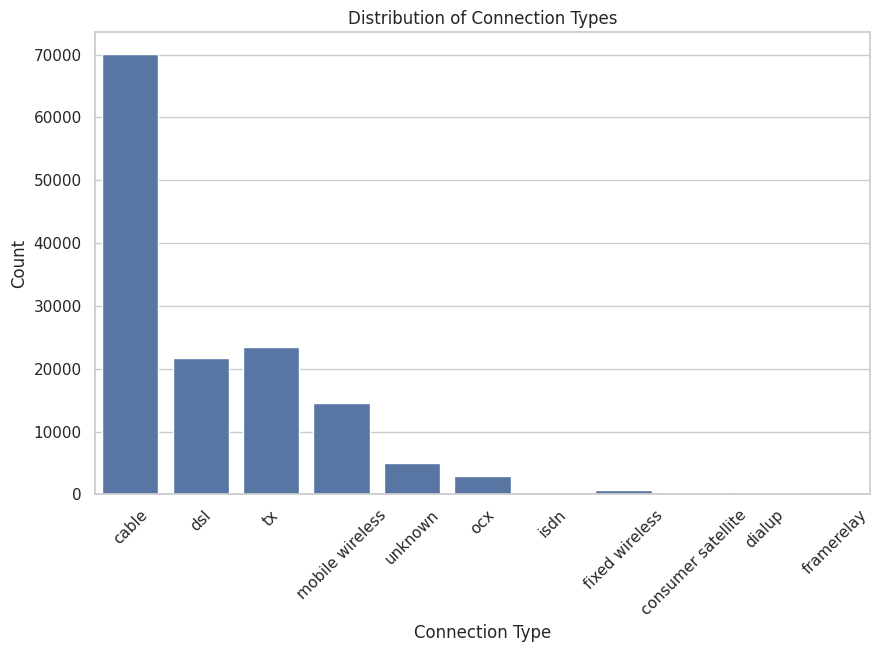

In [28]:
#Plotting the distribution of connection types

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ConnectionType')
plt.title('Distribution of Connection Types')
plt.xlabel('Connection Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [29]:
# Check for unique values in the 'ConnectionSpeed' column
unique_connection_speeds = df['ConnectionSpeed'].unique()

# Print the unique values
print("Unique values in 'ConnectionSpeed' column:")
for value in unique_connection_speeds:
    print(value)

Unique values in 'ConnectionSpeed' column:
low
high
medium
unknown


In [30]:
# Count occurrences of 'unknown' in the 'ConnectionSpeed' column
unknown_count = df['ConnectionSpeed'].value_counts().get('unknown', 0)

# Print the count
print("Occurrences of 'unknown' in 'ConnectionSpeed' column:", unknown_count)


Occurrences of 'unknown' in 'ConnectionSpeed' column: 5004


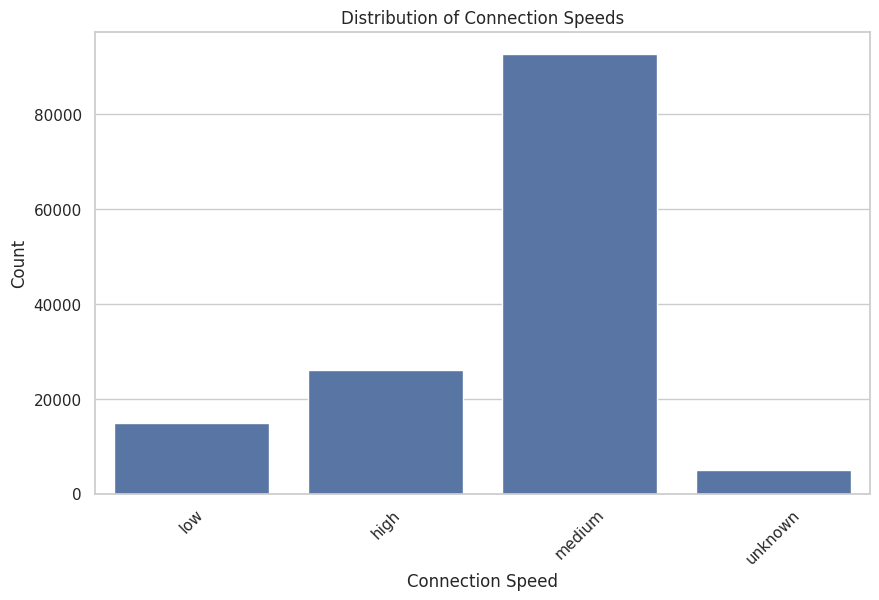

In [31]:
# Plotting the distribution of connection speeds

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ConnectionSpeed')
plt.title('Distribution of Connection Speeds')
plt.xlabel('Connection Speed')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Check unique values in the 'V6CF' column
unique_values_v6cf = df['V6CF'].unique()

# Print the unique values
print("Unique values in 'V6CF' column:")
for value in unique_values_v6cf:
    print(value)

Unique values in 'V6CF' column:
net
net.il
unknown
localdomain
com
org
gr
edu
eu
us
configured
com.sg
io
ro
gov
fr
de
mil
ca.us
cl
net.ve
net.br
com.mx
ru
ac.kr
at
info
ca
225
tx.us
com.tr
in
net.do
net.mx
fl.us
it
al
biz
ny.us
net.sg
nj.us
nv.us
coop
net.co
com.ve
jp
pl
net.pl
co.ba
nl
ec
rs
mi.us
net.ua
com.fj
com.ar
cz
ie
il.us
ne.jp
ch
net.ar
mx
co.th
65
no
la.us
com.br
com.gh
net.ni
spoofed
ve
be
com.au
com.cn
co.uk
hu
dvag
xyz
md
net.au
vn
edu.co
lu
available
hn
co.cr
edu.hk
wa.us
in.us
ua
strong-px1
ga.us
wi.us
md.us
pt
net.in
net.my
63
mm
ws
com.ni
nyc2
net.pk
se
sx
me
co.ke
co
com.ng
com.ec
net.id
or.jp
net.tw
am
mb.ca
gov.ng
14
oh.us
tech
co.zw
az.us
govt.nz
org.pa
gt
net.nz
bo
mg
co.za
com.hk
gob.pe
net.uy
edu.cn
gy
kr
tk
co.nz
ci
vi
sl
ee
com.co
fi
or.us
gov.tt
sc.us
la
net.uk
cr
com.tw
com.qa
ac.uk
192
ct.us
va.us
com.ph
bc.ca
pvt
cn
edu.qa
ad.jp
ps
uk
net.hk
edu.tw
to
hr
sk
jo
adsl
co.in
net.pe
net.ec
gc.ca
is
bm
ky.us
ma.us
co.us
com.pe
wv.us
80
edu.sa
ac.jp
com.sa
es
mn

In [33]:
# Initialize a dictionary to store counts of number strings
number_counts = {}

# Iterate over unique values in the 'V6CF' column
for value in df['V6CF'].unique():
    # Check if the value is a number string
    if str(value).isdigit():
        # Increment the count in the dictionary
        number_counts[value] = df['V6CF'].value_counts().get(value, 0)

# Print the counts of number strings
print("Counts of number strings in 'V6CF' column:")
for number, count in number_counts.items():
    print(f"{number}: {count}")


Counts of number strings in 'V6CF' column:
225: 3
65: 2
63: 7
14: 2
192: 2
80: 3


In [34]:
# Find the mode (most frequent value) of the 'V6CF' column
mode_value = df['V6CF'].mode()[0]

# Replace all number strings with the mode value in the 'V6CF' column
df.loc[df['V6CF'].str.isdigit(), 'V6CF'] = mode_value


In [35]:
# count of Unique values in V6CF column
unique_values = df['V6CF'].nunique()
unique_values

225

In [36]:
# Retrieve unique values in the 'channel' column
unique_channel_values = df['channel'].unique()

# Display the unique values
print("Unique values in the 'channel' column:")
for value in unique_channel_values:
    print(value)


Unique values in the 'channel' column:
SOA
KOL
K45
WMS


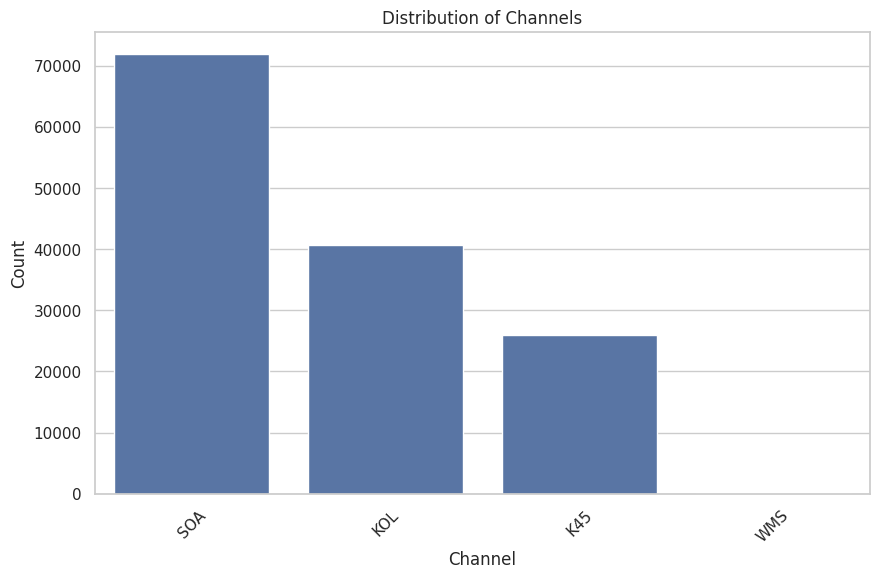

In [37]:
# Plotting the distribution of channels

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='channel')
plt.title('Distribution of Channels')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Dealing with TransactionDateTime, AddressUpdateDate and EmailUpdateDate

# Replace "0" with NaN in the specified columns
columns_to_replace_zero = ['TransactionDateTime', 'AddressUpdateDate', 'EmailUpdateDate']
df[columns_to_replace_zero] = df[columns_to_replace_zero].replace('0', np.nan)

# Convert object columns to datetime format, ignoring NaN values
df['TransactionDateTime'] = pd.to_datetime(df['TransactionDateTime'], format='%d/%m/%Y %H:%M:%S:%f', errors='coerce')
df['AddressUpdateDate'] = pd.to_datetime(df['AddressUpdateDate'], format='%d/%m/%Y %H:%M:%S:%f', errors='coerce')
df['EmailUpdateDate'] = pd.to_datetime(df['EmailUpdateDate'], format='%d/%m/%Y %H:%M:%S:%f', errors='coerce')


In [39]:
# Check for missing values in the datetime columns
missing_values_transaction = df['TransactionDateTime'].isnull().sum()
missing_values_address = df['AddressUpdateDate'].isnull().sum()
missing_values_email = df['EmailUpdateDate'].isnull().sum()

# Print the counts of missing values
print("Missing values in 'TransactionDateTime' column:", missing_values_transaction)
print("Missing values in 'AddressUpdateDate' column:", missing_values_address)
print("Missing values in 'EmailUpdateDate' column:", missing_values_email)


Missing values in 'TransactionDateTime' column: 0
Missing values in 'AddressUpdateDate' column: 0
Missing values in 'EmailUpdateDate' column: 26


In [40]:
# Check the data types of the datetime columns
df.dtypes

V1CF                            int64
V2CF                            int64
V3CF                            int64
V4CF                            int64
V5CF                            int64
AreaCode                      float64
ConnectionOrg                  object
ConnectionType                 object
ConnectionSpeed                object
V6CF                           object
channel                        object
TransactionDateTime    datetime64[ns]
AddressUpdateDate      datetime64[ns]
EmailUpdateDate        datetime64[ns]
webSessOS                      object
webSessWebBrowser              object
IsOldDevice                   float64
MainEntityUse                 float64
Fraud                           int64
Country                        object
dtype: object

In [41]:
# Extracting the year from the 'TransactionDateTime' column and storing it in a new column 'TransactionYear'
df['TransactionYear'] = df['TransactionDateTime'].dt.year

# Extracting the month from the 'TransactionDateTime' column and storing it in a new column 'TransactionMonth'
df['TransactionMonth'] = df['TransactionDateTime'].dt.month

# Extracting the day from the 'TransactionDateTime' column and storing it in a new column 'TransactionDay'
df['TransactionDay'] = df['TransactionDateTime'].dt.day

# Extracting the hour from the 'TransactionDateTime' column and storing it in a new column 'TransactionHour'
df['TransactionHour'] = df['TransactionDateTime'].dt.hour

# Extracting the minute from the 'TransactionDateTime' column and storing it in a new column 'TransactionMinute'
df['TransactionMinute'] = df['TransactionDateTime'].dt.minute

# Extracting the second from the 'TransactionDateTime' column and storing it in a new column 'TransactionSecond'
df['TransactionSecond'] = df['TransactionDateTime'].dt.second


In [42]:
# Calculate the difference in days between TransactionDateTime and EmailUpdateDate
df['Transaction_EmailUpdate_Diff'] = (df['TransactionDateTime'] - df['EmailUpdateDate']).dt.days

# Calculate the difference in days between TransactionDateTime and AddressUpdateDate
df['Transaction_AddressUpdate_Diff'] = (df['TransactionDateTime'] - df['AddressUpdateDate']).dt.days



In [43]:
# Drop the original three columns
df.drop(columns=['TransactionDateTime', 'AddressUpdateDate', 'EmailUpdateDate'], inplace=True)


In [44]:
df.isnull().sum()

V1CF                                 0
V2CF                                 0
V3CF                                 0
V4CF                                 0
V5CF                                 0
AreaCode                             0
ConnectionOrg                        0
ConnectionType                       0
ConnectionSpeed                      0
V6CF                                 0
channel                              0
webSessOS                            0
webSessWebBrowser                    0
IsOldDevice                       4070
MainEntityUse                     4080
Fraud                                0
Country                              0
TransactionYear                      0
TransactionMonth                     0
TransactionDay                       0
TransactionHour                      0
TransactionMinute                    0
TransactionSecond                    0
Transaction_EmailUpdate_Diff        26
Transaction_AddressUpdate_Diff       0
dtype: int64

In [45]:
# Fill missing values in the 'Transaction_EmailUpdate_Diff' column with 0
df['Transaction_EmailUpdate_Diff'].fillna(0, inplace=True)

In [46]:
unique_values = df['webSessOS'].unique()
print(unique_values)


['Mac OS X' 'Windows 7' 'Windows 10' 'iOS' 'Windows Vista' 'Android'
 'Windows 8.1' 'Chrome OS' 'BlackBerry OS' 'Ubuntu' 'Linux' 'Windows XP'
 'Fedora' 'Windows 8' 'Windows RT 8.1' 'Windows Phone' 'BREW' 'Windows RT'
 'FreeBSD' 'Windows NT 4.0']


In [47]:
# Define a function to simplify the OS names
def simplify_os(os):
    if 'Windows' in os:
        return 'Windows'
    else:
        return os

# Apply the function to the 'webSessOS' column
df['webSessOS'] = df['webSessOS'].apply(simplify_os)

# Check unique values again
unique_values = df['webSessOS'].unique()
print(unique_values)


['Mac OS X' 'Windows' 'iOS' 'Android' 'Chrome OS' 'BlackBerry OS' 'Ubuntu'
 'Linux' 'Fedora' 'BREW' 'FreeBSD']


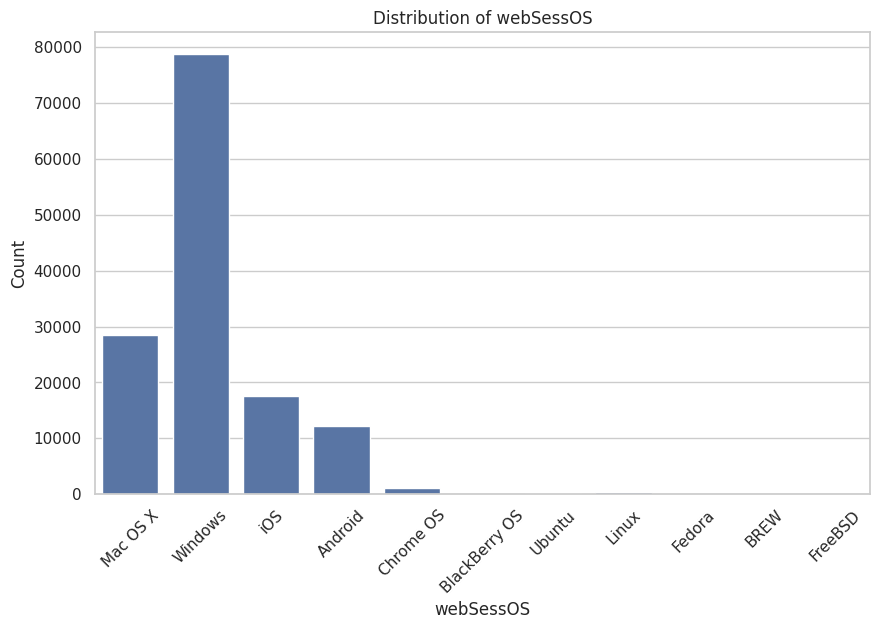

In [48]:
# Plotting the distribution of webSessOS

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='webSessOS')
plt.title('Distribution of webSessOS')
plt.xlabel('webSessOS')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [49]:
unique_values = df['webSessWebBrowser'].unique()
print(unique_values)


['Chrome' 'Edge' 'Mobile Safari' 'Firefox' 'Safari' 'IE' 'Chrome Mobile'
 'Sogou Explorer' 'IE Mobile' 'Amazon Silk' 'Chrome Mobile iOS'
 'Firefox Mobile' 'Vivaldi' 'Opera' 'BlackBerry WebKit' 'Android'
 'QQ Browser' 'UC Browser' 'Yandex Browser' 'Chromium' 'Opera Mini'
 'Opera Mobile' 'Puffin']


In [50]:
# Split each string in the 'webSessWebBrowser' column by space and keep only the first part
df['webSessWebBrowser'] = df['webSessWebBrowser'].apply(lambda x: x.split()[0])

# Check unique values again
unique_values = df['webSessWebBrowser'].unique()
print(unique_values)


['Chrome' 'Edge' 'Mobile' 'Firefox' 'Safari' 'IE' 'Sogou' 'Amazon'
 'Vivaldi' 'Opera' 'BlackBerry' 'Android' 'QQ' 'UC' 'Yandex' 'Chromium'
 'Puffin']


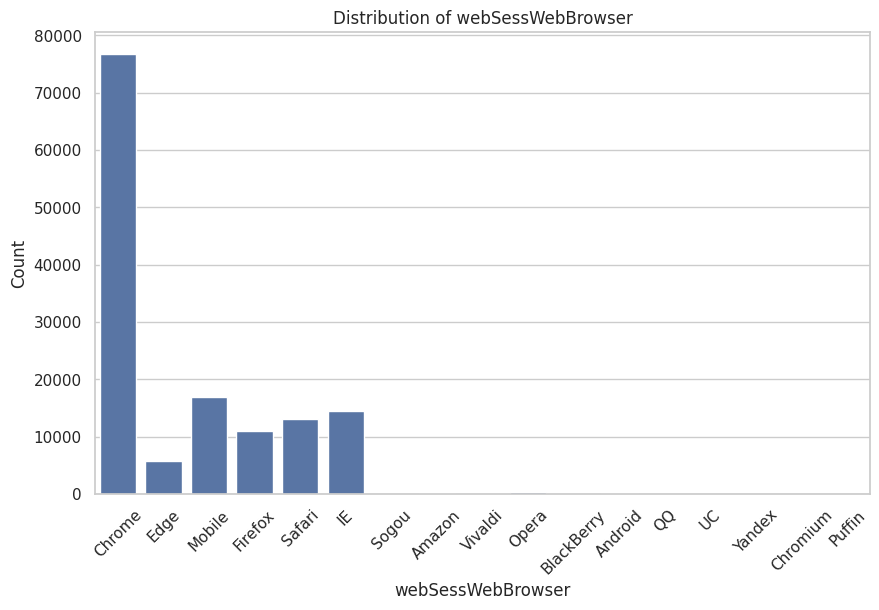

In [51]:
# Plotting the distribution of webSessWebBrowser

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='webSessWebBrowser')
plt.title('Distribution of webSessWebBrowser')
plt.xlabel('webSessWebBrowser')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [52]:
unique_values = df['IsOldDevice'].unique()
print(unique_values)


[ 0.  1. nan]


In [53]:
# Fill missing values in the 'IsOldDevice' column with its mode
df['IsOldDevice'] = df['IsOldDevice'].fillna(df['IsOldDevice'].mode().iloc[0])

In [54]:
unique_values = df['MainEntityUse'].unique()
print(unique_values)


[ nan 315. 333. 327. 394. 274.  66. 453. 253. 325. 328. 364. 335.  74.
 318. 416. 361. 287. 346. 389. 217. 388. 362. 359. 393. 455. 319.   0.
 339. 407. 391. 332. 395. 403. 414. 396. 390. 410. 444. 387. 374. 392.
 139. 465. 291. 370. 458. 466. 384. 397. 167. 459. 353. 351. 299. 501.
 314. 312. 272. 356. 280. 519. 385. 355. 311.  35. 307. 297. 295. 216.
 368. 473. 386. 276. 326. 317. 324. 275. 262. 298. 321.   3. 114. 383.
 380. 408. 350. 449. 301. 267.  32. 342. 468. 357. 363. 451. 450.  14.
 430. 348. 337. 413. 369. 442. 457. 371. 209. 462. 412. 171. 294. 127.
 252. 349. 231. 260. 372. 288. 376. 365. 257.  78. 268. 373. 290. 456.
 336. 460. 377. 341. 340.  47. 405. 330. 415. 285. 223. 382. 367. 292.
 464. 305. 163. 258. 289. 406. 310. 381. 313. 218. 247. 488.  91. 286.
  22. 375. 354. 452. 401. 470. 329. 300. 293. 400. 151. 338. 316. 461.
 283.  43. 366. 296. 334. 125. 308. 279.  60. 343. 427. 281. 152.  49.
 264. 150. 409. 404. 141. 265. 478. 418. 463. 237.  96. 303. 277. 284.
 524. 

In [55]:
# Fill missing values in the 'MainEntityUse' column with its median
median_value = df['MainEntityUse'].median()
df['MainEntityUse'] = df['MainEntityUse'].fillna(median_value)

# Display the unique values after filling missing values with median
unique_values = df['MainEntityUse'].unique()
print(unique_values)

[373. 315. 333. 327. 394. 274.  66. 453. 253. 325. 328. 364. 335.  74.
 318. 416. 361. 287. 346. 389. 217. 388. 362. 359. 393. 455. 319.   0.
 339. 407. 391. 332. 395. 403. 414. 396. 390. 410. 444. 387. 374. 392.
 139. 465. 291. 370. 458. 466. 384. 397. 167. 459. 353. 351. 299. 501.
 314. 312. 272. 356. 280. 519. 385. 355. 311.  35. 307. 297. 295. 216.
 368. 473. 386. 276. 326. 317. 324. 275. 262. 298. 321.   3. 114. 383.
 380. 408. 350. 449. 301. 267.  32. 342. 468. 357. 363. 451. 450.  14.
 430. 348. 337. 413. 369. 442. 457. 371. 209. 462. 412. 171. 294. 127.
 252. 349. 231. 260. 372. 288. 376. 365. 257.  78. 268. 290. 456. 336.
 460. 377. 341. 340.  47. 405. 330. 415. 285. 223. 382. 367. 292. 464.
 305. 163. 258. 289. 406. 310. 381. 313. 218. 247. 488.  91. 286.  22.
 375. 354. 452. 401. 470. 329. 300. 293. 400. 151. 338. 316. 461. 283.
  43. 366. 296. 334. 125. 308. 279.  60. 343. 427. 281. 152.  49. 264.
 150. 409. 404. 141. 265. 478. 418. 463. 237.  96. 303. 277. 284. 524.
 358. 

In [56]:
df.dtypes

V1CF                                int64
V2CF                                int64
V3CF                                int64
V4CF                                int64
V5CF                                int64
AreaCode                          float64
ConnectionOrg                      object
ConnectionType                     object
ConnectionSpeed                    object
V6CF                               object
channel                            object
webSessOS                          object
webSessWebBrowser                  object
IsOldDevice                       float64
MainEntityUse                     float64
Fraud                               int64
Country                            object
TransactionYear                     int64
TransactionMonth                    int64
TransactionDay                      int64
TransactionHour                     int64
TransactionMinute                   int64
TransactionSecond                   int64
Transaction_EmailUpdate_Diff      

<font color='blue'><b>Bivariate Analysis of Object Columns and Fraud</b></font>

<b>Visualizing the distribution of object columns and their relationship with the target variable "Fraud" using bar plots


<Figure size 1000x600 with 0 Axes>

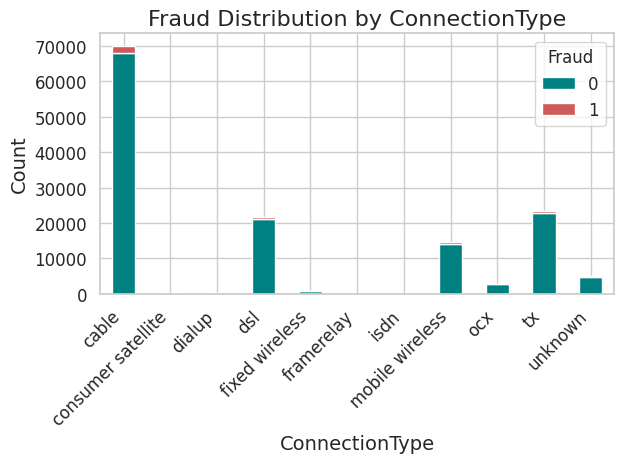

<Figure size 1000x600 with 0 Axes>

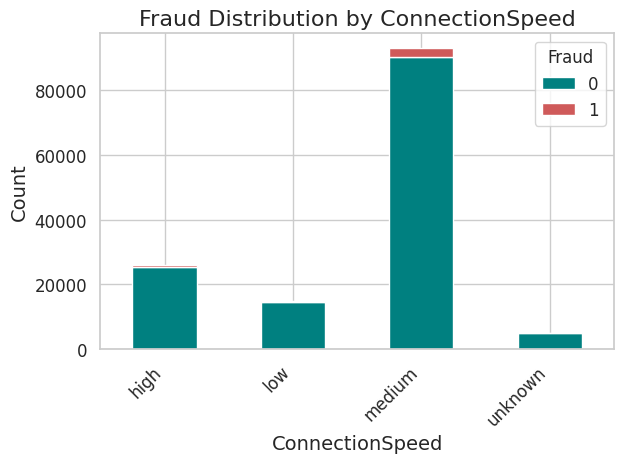

<Figure size 1000x600 with 0 Axes>

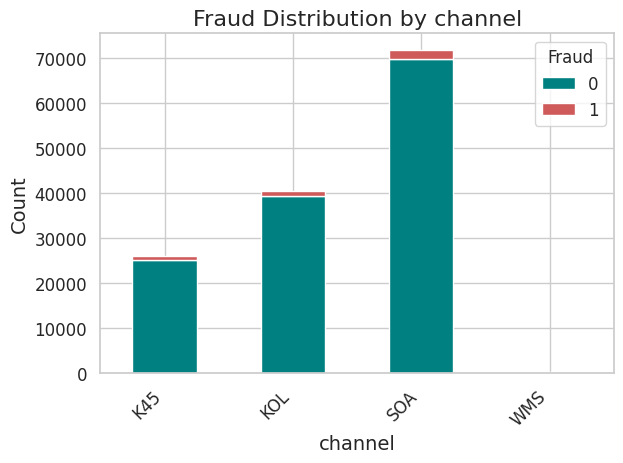

<Figure size 1000x600 with 0 Axes>

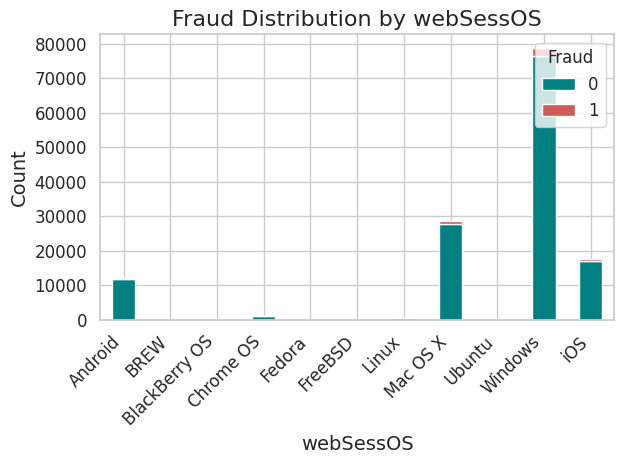

<Figure size 1000x600 with 0 Axes>

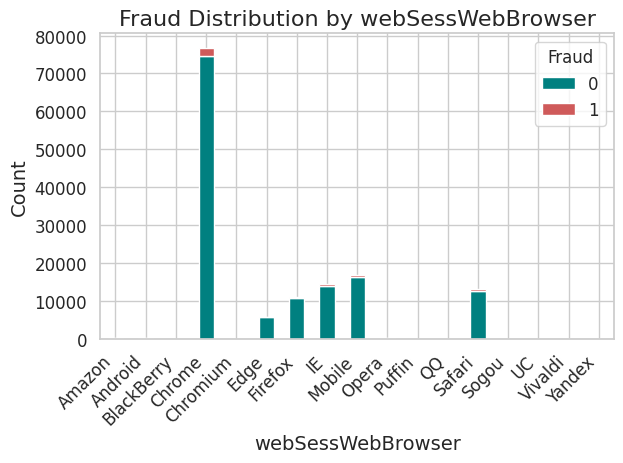

In [70]:
# Convert the 'Fraud' column to categorical
df['Fraud'] = df['Fraud'].astype('category')

# Select all object columns excluding specified ones
excluded_columns = ['ConnectionOrg', 'V6CF','Country']
object_columns = [col for col in df.select_dtypes(include=['object']).columns if col not in excluded_columns]

# Set style
sns.set_style("whitegrid")

# Loop through each remaining object column
for object_column in object_columns:
    # Count the occurrences of each category with respect to Fraud
    fraud_counts = df.groupby([object_column, 'Fraud']).size().unstack(fill_value=0)

    # Plot the relationship between the object column and the target column (Fraud)
    plt.figure(figsize=(10, 6))
    fraud_counts.plot(kind='bar', stacked=True, color=['#008080','#CF5A5A'])
    plt.title('Fraud Distribution by ' + object_column, fontsize=16)
    plt.xlabel(object_column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Fraud', loc='upper right', fontsize=12)
    plt.tight_layout()
    plt.show()


<b>In this scenario, traditional encoding methods like one-hot encoding or label encoding are not suitable due to the presence of many categories in the categorical variables. One-hot encoding would lead to a high-dimensional and sparse dataset, while label encoding may introduce ordinal relationships that do not exist. Target encoding, on the other hand, leverages the relationship between categorical variables and the target variable to encode categories as numerical values, making it a more appropriate choice for handling high-cardinality categorical variables in machine learning tasks.<b>

In [ ]:
# Define the target variable
target_variable = "Fraud"

# Identify object columns
object_columns = df.select_dtypes(include=['object']).columns

# Iterate through each object column
for col in object_columns:
    # Calculate mean target value for each category in the column
    target_mean = df.groupby(col)[target_variable].mean()

    # Replace categories with mean target values
    df[col] = df[col].map(target_mean)

# Print the DataFrame after target encoding
print(df)


        V1CF  V2CF  V3CF  V4CF   V5CF  AreaCode  ConnectionOrg  \
0         99    98    10   803  19820     602.0       0.015152   
1         99    94    61   602  16980     512.0       0.015152   
2         76    95    66   505  35620     407.0       0.015152   
3         99    23    50     0  35620     202.0       0.015152   
4         99    74    80   602  19100     313.0       0.015152   
...      ...   ...   ...   ...    ...       ...            ...   
138747    86    85    80   602      0     630.0       0.000000   
138748    99    97    90   527  41860     630.0       0.000000   
138749    99    88    90   618  12420     212.0       0.000000   
138750    99    23    23   819  16980     704.0       0.000000   
138751    99    63    50   501  19100     305.0       0.000000   

        ConnectionType  ConnectionSpeed      V6CF  ...  Fraud   Country  \
0             0.028495         0.029004  0.029080  ...      0  0.028556   
1             0.028495         0.028126  0.000000  ...   

In [ ]:
# Splitting the dataset into features and target
X = df.drop('Fraud', axis=1)  # Features
y = df[['Fraud']]  # Target variable

<font color='green'><b>Using SMOTEENN: A Combination Sampling Technique to handle Class Imbalance</b></font>

SMOTEENN stands for Synthetic Minority Over-sampling Technique (SMOTE) combined with Edited Nearest Neighbors (ENN). It is a popular technique used to address class imbalance in datasets. Here's how it works:

- <b>SMOTE (Synthetic Minority Over-sampling Technique):</b>
  - SMOTE generates synthetic samples for the minority class by interpolating between existing minority class samples. This helps to increase the representation of the minority class in the dataset.

- <b>ENN (Edited Nearest Neighbors):</b>
  - ENN is an undersampling technique that removes noisy and borderline samples from both the majority and minority classes. It focuses on removing samples that are misclassified by their nearest neighbors.

- <b>Combining SMOTE and ENN:</b>
  - SMOTEENN combines the strengths of SMOTE and ENN by first oversampling the minority class using SMOTE to increase its representation and then using ENN to clean up the dataset by removing noisy samples from both classes.


In [ ]:
#Balancing Target Class using SMOTEENN
from imblearn.combine import SMOTEENN

In [ ]:
smoteenn = SMOTEENN()
X, y = smoteenn.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X_train: Features for training
# X_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing
# test_size: The proportion of the dataset to include in the test split (here, 20%)
# random_state: Controls the shuffling of the data to ensure reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Logisitc Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Initialize and fit a logistic regression model using scikit-learn
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Calculate and print evaluation metrics for the model's performance
# - Accuracy
# - Precision
# - Recall
# - F1 Score
# These metrics are essential for assessing the classification model's effectiveness

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)

f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Evaluation Metrics:")
print("Accuracy - Training Set:", accuracy_train)
print("Accuracy - Test Set:", accuracy_test)
print()
print("Precision - Training Set:", precision_train)
print("Precision - Test Set:", precision_test)
print()
print("Recall - Training Set:", recall_train)
print("Recall - Test Set:", recall_test)
print()
print("F1 Score - Training Set:", f1_train)
print("F1 Score - Test Set:", f1_test)
print()

# Display confusion matrices for both the training and test sets
# The confusion matrix provides detailed insights into the model's performance
# by showing the counts of true positive, true negative, false positive, and false negative predictions
print("Confusion Matrix - Training Set:")
print(confusion_matrix(y_train, y_train_pred))
print("Confusion Matrix - Test Set:")
print(confusion_matrix(y_test, y_test_pred))


Evaluation Metrics:
Accuracy - Training Set: 0.5717730778961421
Accuracy - Test Set: 0.5763284816122642

Precision - Training Set: 0.5693820443929141
Precision - Test Set: 0.5738617388400312

Recall - Training Set: 0.9779696879757197
Recall - Test Set: 0.9795910611128003

F1 Score - Training Set: 0.7197308390142507
F1 Score - Test Set: 0.7237424010557794

Confusion Matrix - Training Set:
[[  4074  77252]
 [  2301 102146]]
Confusion Matrix - Test Set:
[[  992 19140]
 [  537 25775]]


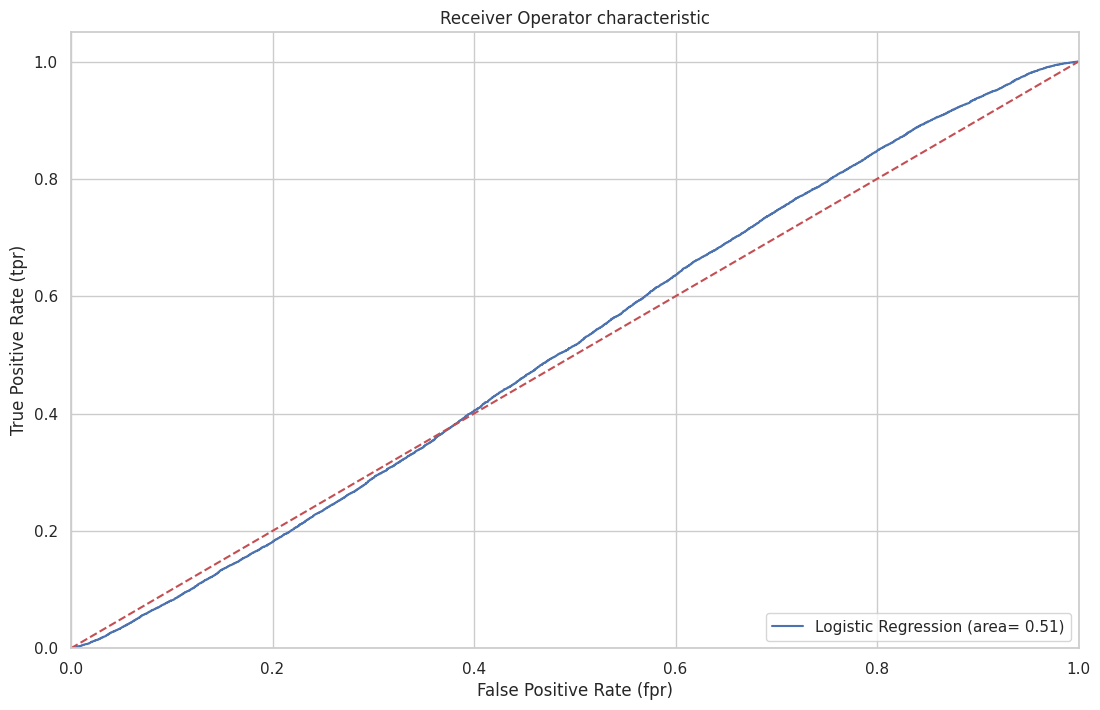

In [ ]:
# Plot ROC_AUC_Curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title('Receiver Operator characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<b>Find out how likely each training data point is to belong to the positive category.

This helps us understand the confidence level of our model's predictions and make better decisions.

In [ ]:
# Predict probabilities for the training set
train_pred_prob = log_reg.predict_proba(X_train)[:, 1]

In [ ]:
# Define column names for the DataFrame
column_names = ["Cutoff_Prob", "TP", "FN", "TN", "FP", "P", "N"]

# Create an empty DataFrame with the specified column names
cutoff_data = pd.DataFrame(columns=column_names)

# Generate a range of cutoff probabilities from 0 to 1 with a step size of 0.01
Cutoff_Prob = np.arange(0, 1.01, 0.01)

# Iterate over each cutoff probability
for cutoff in Cutoff_Prob:
    # Predict binary labels based on the probability cutoff
    y_train["pred_y"] = (train_pred_prob > cutoff).astype("int64")

    # Calculate True Positives (TP), False Negatives (FN), True Negatives (TN), False Positives (FP)
    TP = np.logical_and((y_train.pred_y == 1), (y_train.Fraud == 1)).sum()
    FN = np.logical_and((y_train.pred_y == 0), (y_train.Fraud == 1)).sum()
    TN = np.logical_and((y_train.pred_y == 0), (y_train.Fraud == 0)).sum()
    FP = np.logical_and((y_train.pred_y == 1), (y_train.Fraud == 0)).sum()

    # Calculate total Positive (P) and Negative (N) instances
    P = TP + FN
    N = TN + FP

    # Create a dictionary with the calculated values
    temp_data = {
        "Cutoff_Prob": cutoff,
        "TP": TP,
        "FN": FN,
        "TN": TN,
        "FP": FP,
        "P": P,
        "N": N
    }

    # Append the dictionary as a new row to the cutoff_data DataFrame
    cutoff_data = cutoff_data.append(temp_data, ignore_index=True)

# Dropping the pred_y column from y_train data to avoid conflicts
y_train.drop("pred_y", axis=1, inplace=True)


In [ ]:
# Sensitivity (Sn)
cutoff_data['Sn'] = cutoff_data["TP"] / cutoff_data["P"]

# Specificity (Sp)
cutoff_data['Sp'] = cutoff_data["TN"] / cutoff_data["N"]

# Distance
cutoff_data['Dist'] = ((1 - cutoff_data["Sn"])**2 + (1 - cutoff_data["Sp"])**2)**0.5

# Kolmogorov-Smirnov (KS)
cutoff_data['KS'] = ((cutoff_data["TP"] / cutoff_data["P"]) - (cutoff_data["FP"] / cutoff_data["N"])).abs()

# Recall (Re)
cutoff_data['Re'] = cutoff_data["TP"] / cutoff_data["P"]

# Precision (Pr)
cutoff_data['Pr'] = cutoff_data["TP"] / (cutoff_data["TP"] + cutoff_data["FP"])

# True Positive Rate (tpr)
cutoff_data['tpr'] = cutoff_data["Re"]

# False Positive Rate (fpr)
cutoff_data['fpr'] = 1 - cutoff_data["Sp"]

# F1 Score
cutoff_data['f1'] = 2 * (cutoff_data["Pr"] * cutoff_data["Re"]) / (cutoff_data["Pr"] + cutoff_data["Re"])


<font color='blue'><b>We will be calculating the following cutoffs:</b></font>

1. <b>dist_cutoff:</b> Finds the cutoff probability value based on the minimum distance calculated in the cutoff_data DataFrame. It selects the row with the smallest distance and retrieves the corresponding cutoff probability value.

2. <b>ks_cutoff:</b> Determines the cutoff probability value based on the maximum Kolmogorov-Smirnov (KS) statistic calculated in the cutoff_data DataFrame. It selects the row with the largest KS statistic and retrieves the corresponding cutoff probability value.

3. <b>f1_cutoff:</b> Calculates the cutoff probability value based on the maximum F1 score calculated in the cutoff_data DataFrame. It selects the row with the highest F1 score and retrieves the corresponding cutoff probability value.


In [ ]:
# Cutoff probability value based on minimum distance
dist_cutoff = cutoff_data.loc[np.argmin(cutoff_data["Dist"]), "Cutoff_Prob"]

# Cutoff probability value based on maximum Kolmogorov-Smirnov (KS) statistic
ks_cutoff = cutoff_data.loc[np.argmax(cutoff_data["KS"]), "Cutoff_Prob"]

# Cutoff probability value based on maximum F1 score
f1_cutoff = cutoff_data.loc[np.argmax(cutoff_data["f1"]), "Cutoff_Prob"]


In [ ]:
print("The dist cutoff determined is:", dist_cutoff)
print("The KS cutoff determined is:", ks_cutoff)
print("The f1 cutoff determined is:", f1_cutoff)


The dist cutoff determined is: 0.56
The KS cutoff determined is: 0.54
The f1 cutoff determined is: 0.48


In [ ]:
# List of cutoff values
cutoffs = [dist_cutoff, ks_cutoff, f1_cutoff]

# Iterate over each cutoff value
for cutoff in cutoffs:
    # Predict binary labels based on the current cutoff value for both train and test data
    y_pred_train = (log_reg.predict_proba(X_train)[:,1] > cutoff).astype(int)
    y_pred_test = (log_reg.predict_proba(X_test)[:,1] > cutoff).astype(int)

    # Print results using the current cutoff value
    print("Using the cutoff value as:", cutoff)
    print('Accuracy on train data:', accuracy_score(y_train, y_pred_train))
    print("Accuracy on test data:", accuracy_score(y_test, y_pred_test))
    print("Recall on train data:", recall_score(y_train, y_pred_train))
    print("Recall on test data:", recall_score(y_test, y_pred_test))
    print("Precision on train data:", precision_score(y_train, y_pred_train))
    print("Precision on test data:", precision_score(y_test, y_pred_test))
    print("f1 score on train data:", f1_score(y_train, y_pred_train))
    print("f1 score on test data:", f1_score(y_test, y_pred_test))
    print("\n")


Using the cutoff value as: 0.56
Accuracy on train data: 0.5283275825873512
Accuracy on test data: 0.5286797002842133
Recall on train data: 0.607714917613718
Recall on test data: 0.6091137123745819
Precision on train data: 0.5763813847900113
Precision on test data: 0.580015923566879
f1 score on train data: 0.5916335775404059
f1 score on test data: 0.5942088091353998


Using the cutoff value as: 0.54
Accuracy on train data: 0.5642423818315901
Accuracy on test data: 0.5676513650848334
Recall on train data: 0.8507664174174462
Recall on test data: 0.8526907874733962
Precision on train data: 0.5761711784730102
Precision on test data: 0.5806418219461698
f1 score on train data: 0.687047689738356
f1 score on test data: 0.6908486266781624


Using the cutoff value as: 0.48
Accuracy on train data: 0.5695929979060467
Accuracy on test data: 0.5736155369907846
Recall on train data: 0.991593822704338
Recall on test data: 0.9925129218607479
Precision on train data: 0.5670384179491812
Precision on test 

In [ ]:
default=0.5 # default cutoff

In [ ]:
# Define the cutoff values
cutoffs = [default, dist_cutoff, ks_cutoff, f1_cutoff]

# Initialize an empty list to store results
results = []

# Iterate over each cutoff value
for cutoff in cutoffs:
    # Predict binary labels based on the current cutoff value for both train and test data
    y_pred_train = (log_reg.predict_proba(X_train)[:, 1] > cutoff).astype(int)
    y_pred_test = (log_reg.predict_proba(X_test)[:, 1] > cutoff).astype(int)

    # Calculate evaluation metrics for train and test data
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)

    # Store the results in a dictionary
    result_dict = {
        "Cutoff": cutoff,
        'Accuracy_train': accuracy_train,
        'Accuracy_test': accuracy_test,
        'Recall_train': recall_train,
        'Recall_test': recall_test,
        'Precision_train': precision_train,
        'Precision_test': precision_test,
        'F1_train': f1_train,
        'F1_test': f1_test,
    }

    # Append the dictionary to the results list
    results.append(result_dict)

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
results_df


,Cutoff,Accuracy_train,Accuracy_test,Recall_train,Recall_test,Precision_train,Precision_test,F1_train,F1_test
0,0.50,0.571773,0.576328,0.977970,0.979591,0.569382,0.573862,0.719731,0.723742
1,0.56,0.528328,0.528680,0.607715,0.609114,0.576381,0.580016,0.591634,0.594209
2,0.54,0.564242,0.567651,0.850766,0.852691,0.576171,0.580642,0.687048,0.690849
3,0.48,0.569593,0.573616,0.991594,0.992513,0.567038,0.571182,0.721494,0.725084


**Decision Tree Classifier**

In [ ]:
# Import the DecisionTreeClassifier class from the sklearn.tree module
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)  # Calculate accuracy for the training set
precision_train = precision_score(y_train, y_train_pred)  # Calculate precision for the training set
recall_train = recall_score(y_train, y_train_pred)  # Calculate recall for the training set
f1_train = f1_score(y_train, y_train_pred)  # Calculate F1 score for the training set

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)  # Calculate accuracy for the test set
precision_test = precision_score(y_test, y_test_pred)  # Calculate precision for the test set
recall_test = recall_score(y_test, y_test_pred)  # Calculate recall for the test set
f1_test = f1_score(y_test, y_test_pred)  # Calculate F1 score for the test set

# Print evaluation metrics for the training data
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()

# Print evaluation metrics for the test data
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Metrics:
Accuracy: 0.9588106106278529
Precision: 0.9579563797439844
Recall: 0.9698616600790514
F1 Score: 0.9638722592585598


<b>To deal with Overfitting, we will use Decision Tree Pre-Pruning and we will use RandomizedSearchCV  over GridSearch CV to reduce processing time<b>

In [ ]:

# Define the hyperparameters and their ranges for tuning
parameters = {
    "max_depth": np.arange(1, 10),  # Maximum depth of the decision tree
    "criterion": ["gini", "entropy"],  # Criteria to measure the quality of a split
    "splitter": ["best", "random"],  # Strategy to choose the split at each node
    "min_samples_split": np.arange(2, 20),  # Minimum number of samples required to split an internal node
    "min_samples_leaf": np.arange(1, 20),  # Minimum number of samples required to be at a leaf node
    "max_features": ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize a Decision Tree Classifier object
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(dt_classifier, parameters, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator from the randomized search
best_dt_classifier = random_search.best_estimator_

# Make predictions on the training and test data using the best estimator
y_train_pred = best_dt_classifier.predict(X_train)
y_test_pred = best_dt_classifier.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print the best parameters found by the randomized search
print("Best Parameters:", random_search.best_params_)

# Print the evaluation metrics for the training data
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()

# Print the evaluation metrics for the test data
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Best Parameters: {'splitter': 'best', 'min_samples_split': 8, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 9, 'criterion': 'gini'}
Training Metrics:
Accuracy: 0.8235588594682758
Precision: 0.8841976605804591
Recall: 0.7895870632952599
F1 Score: 0.8342184323126879

Test Metrics:
Accuracy: 0.8227327534234777
Precision: 0.8871803657857541
Recall: 0.7872073578595318
F1 Score: 0.8342093074769932


**Random Forest Classifier**

In [ ]:
# Import the RandomForestClassifier class from the sklearn.tree module
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters and their ranges for tuning
parameters = {
    'n_estimators': [5, 10],  # Number of trees in the forest
    'max_depth': np.arange(1,7),  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 20),  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(rf_classifier, parameters, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator
best_rf_classifier = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_rf_classifier.predict(X_train)
y_test_pred = best_rf_classifier.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Best Parameters: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5}
Training Metrics:
Accuracy: 0.8740033271778748
Precision: 0.8544451535630295
Recall: 0.9353609983921599
F1 Score: 0.8930740024946203

Test Metrics:
Accuracy: 0.8755706779223017
Precision: 0.8569586281412289
Recall: 0.9362552835002476
F1 Score: 0.8948536904935216


**Bagging Classifier**

In [ ]:
# Import the BaggingClassifier class from the sklearn.ensemble module
from sklearn.ensemble import BaggingClassifier

# Initialize base estimator (Decision Tree) with limited depth
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=1)

# Define the hyperparameters and their ranges for tuning
parameters = {
    'n_estimators': [5, 10],  # Number of trees in the forest
    'max_samples': [0.5, 0.8],  # Maximum number of samples to draw from X to train each base estimator
    'max_features': [0.5, 0.8]  # Maximum number of features to consider when looking for the best split
}

# Initialize Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# Perform RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(bagging_classifier, parameters, n_iter=5, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator
best_bagging_classifier = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_bagging_classifier.predict(X_train)
y_test_pred = best_bagging_classifier.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)




Best Parameters: {'n_estimators': 10, 'max_samples': 0.5, 'max_features': 0.5}
Training Metrics:
Accuracy: 0.8384542082339577
Precision: 0.8210818547066026
Recall: 0.9114348059107266
F1 Score: 0.8639023195478831

Test Metrics:
Accuracy: 0.8379274700663278
Precision: 0.8225834222941562
Recall: 0.909599786756026
F1 Score: 0.8639059674502713


**AdaBoostClassifier**

In [ ]:
# Import the AdaBoostClassifier class from the sklearn.ensemble module
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost Classifier with hyperparameter tuning parameters
ab_tuned = AdaBoostClassifier(random_state=1)

# Define the grid of parameters to choose from
parameter_grid = {
    'n_estimators': np.arange(5, 40, 2),  # Number of estimators (weak learners) to use
    'learning_rate': [0.5, 0.1, 0.01, 0.001]  # Learning rate shrinks the contribution of each classifier
}

# Perform RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(ab_tuned, parameter_grid, scoring='recall', cv=5, n_iter=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best estimator from the randomized search
best_ab_tuned = random_search.best_estimator_

# Make predictions on the training and test data using the best estimator
y_train_pred = best_ab_tuned.predict(X_train)
y_test_pred = best_ab_tuned.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print the best parameters found by the randomized search
print("Best Parameters:", random_search.best_params_)

# Print the evaluation metrics for the training data
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()

# Print the evaluation metrics for the test data
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Best Parameters: {'n_estimators': 13, 'learning_rate': 0.5}
Training Metrics:
Accuracy: 0.8386426406378706
Precision: 0.8286596392184536
Recall: 0.8990601791593293
F1 Score: 0.8624255805520237

Test Metrics:
Accuracy: 0.8401240416917909
Precision: 0.8313223344003939
Recall: 0.8998895700849168
F1 Score: 0.8642480983031012


**GradientBoostingClassifier**

In [ ]:
# Import the GradientBoostingClassifier class from the sklearn.ensemble module
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier with hyperparameter tuning parameters
gb_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameter_grid = {
    'n_estimators': [5, 8],  # Set the number of boosting stages to choose from
    'learning_rate': [0.05, 0.1],  # Set the learning rate to choose from
    'max_depth': [3, 4],  # Set the maximum depth of trees to choose from
    'min_samples_split': [2, 3],  # Set the minimum samples required to split to choose from
    'min_samples_leaf': [1, 2]  # Set the minimum samples required at leaf nodes to choose from
}

# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(gb_tuned, parameter_grid, cv=5, n_iter=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best estimator
best_gb_tuned = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_gb_tuned.predict(X_train)
y_test_pred = best_gb_tuned.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print the best parameters found by the randomized search
print("Best Parameters:", random_search.best_params_)

# Print evaluation metrics for the training data
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()

# Print evaluation metrics for the test data
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Best Parameters: {'n_estimators': 8, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.1}
Training Metrics:
Accuracy: 0.8896916707493687
Precision: 0.8911337104210382
Recall: 0.9374282214225557
F1 Score: 0.9053140409170521

Test Metrics:
Accuracy: 0.8894176931690929
Precision: 0.890785637132165
Recall: 0.9373595826510795
F1 Score: 0.9055493221991282


**XGBClassifier**

In [ ]:
# Import the XGBClassifier class from the xgboost module

from xgboost import XGBClassifier

# Initialize XGBoost Classifier with hyperparameter tuning parameters
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from (with reduced values for faster execution)
parameter_grid = {
    'n_estimators': [5,15],  # Number of trees in the ensemble
    'subsample': [0.7, 0.8, 0.09],  # Subsample ratio of the training instances
    'gamma': [0, 1, 3],  # Minimum loss reduction required to make a further partition on a leaf node
    'colsample_bytree': [0.7, 0.8, 0.09],  # Subsample ratio of columns when constructing each tree
    'colsample_bylevel': [0.7, 0.8, 0.09]  # Subsample ratio of columns for each level when constructing each tree
}


# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(xgb_tuned, parameter_grid, scoring='recall', cv=5, n_iter=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best estimator
best_xgb_tuned = random_search.best_estimator_

# Make predictions on the training and test data
y_train_pred = best_xgb_tuned.predict(X_train)
y_test_pred = best_xgb_tuned.predict(X_test)

# Calculate evaluation metrics for the training data
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

# Calculate evaluation metrics for the test data
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred,
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("Best Parameters:", random_search.best_params_)
print("Training Metrics:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)
print()
print("Test Metrics:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Best Parameters: {'subsample': 0.09, 'n_estimators': 15, 'gamma': 0, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.09}
Training Metrics:
Accuracy: 0.9061498952854212
Precision: 0.90637808550252
Recall: 0.9352174412372712
F1 Score: 0.9181096443838963

Test Metrics:
Accuracy: 0.9042553191489362
Precision: 0.9045513172149623
Recall: 0.9358364114085526
F1 Score: 0.9170491436247621


<b>Feature Importance<b>

In [ ]:
# Get feature importances
feature_importances = best_xgb_tuned.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importance:")
print(importance_df)


Feature Importance:
                           Feature  Importance
17                TransactionMonth    0.183983
9                             V6CF    0.161710
13                     IsOldDevice    0.092704
12               webSessWebBrowser    0.074634
2                             V3CF    0.063834
10                         channel    0.059239
11                       webSessOS    0.050707
6                    ConnectionOrg    0.049569
1                             V2CF    0.042341
0                             V1CF    0.036532
7                   ConnectionType    0.031050
3                             V4CF    0.027751
8                  ConnectionSpeed    0.025615
18                  TransactionDay    0.021915
19                 TransactionHour    0.017520
21               TransactionSecond    0.012901
14                   MainEntityUse    0.012393
20               TransactionMinute    0.010595
5                         AreaCode    0.008779
15                         Country    0.

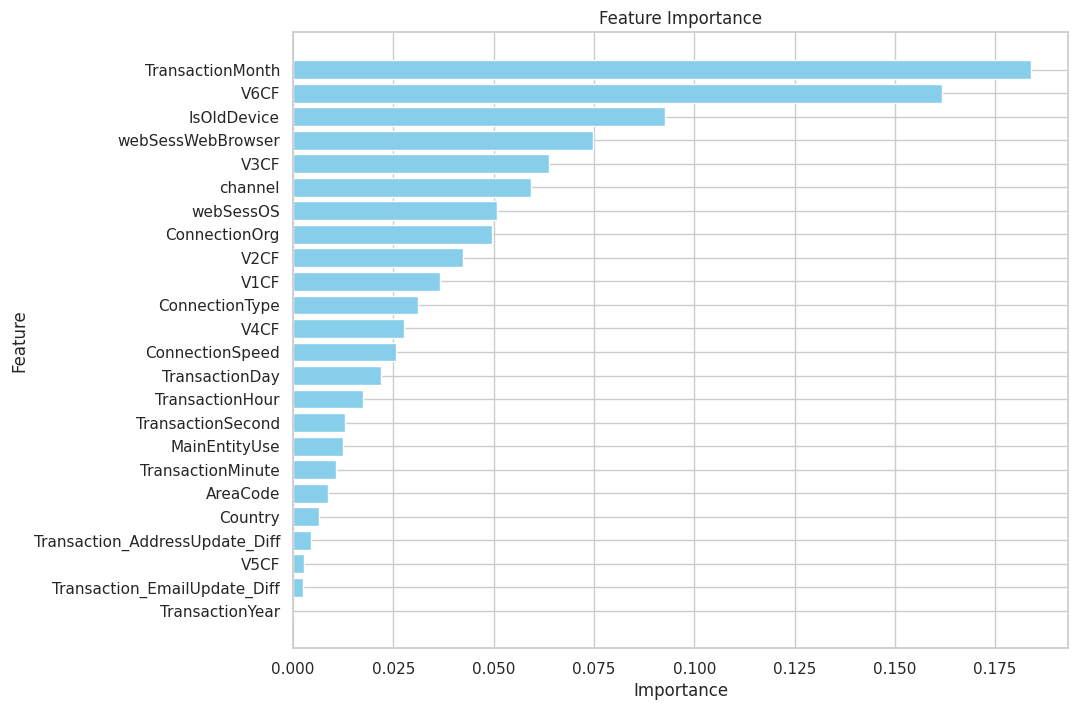

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()


<font color='blue'><b>Significant Predictors:</b></font>

- <b>'TransactionMonth', 'V6CF', 'IsOldDevice', 'webSessWebBrowser',</b> and <b>'V3CF'</b> emerged as the top five most important features for predicting fraudulent transactions, with importance values ranging from 0.183983 to 0.063834.

<font color='blue'><b>Less Pronounced Factors:</b></font>

- Other features such as <b>'ConnectionOrg', 'channel', 'webSessOS', 'V2CF',</b> and <b>'V1CF'</b> also contributed to fraud prediction, albeit with relatively lower importance values.


Summary

In [ ]:
# Define the data for each classifier
data = {
    "Classifier": ["Logistic Regression", "Decision Tree", "Decision Tree (Pre-Pruning)", "Random Forest",
                   "Bagging Classifier", "AdaBoost Classifier", "Gradient Boost Classifier", "XGBoost Classifier"],
    "Accuracy Train": [0.5718, 1.0, 0.8236, 0.8740, 0.8385, 0.8386, 0.8897, 0.9061],
    "Accuracy Test": [0.5763, 0.9588, 0.8227, 0.8756, 0.8379, 0.8401, 0.8894, 0.9043],
    "Precision Train": [0.5694, 1.0, 0.8842, 0.8544, 0.8211, 0.8287, 0.8911, 0.9064],
    "Precision Test": [0.5739, 0.9580, 0.8872, 0.8570, 0.8226, 0.8313, 0.8908, 0.9046],
    "Recall Train": [0.9780, 1.0, 0.7896, 0.9354, 0.9114, 0.8991, 0.9374, 0.9352],
    "Recall Test": [0.9796, 0.9699, 0.7872, 0.9363, 0.9096, 0.8999, 0.9374, 0.9358],
    "F1 Score Train": [0.7197, 1.0, 0.8342, 0.8931, 0.8639, 0.8624, 0.9053, 0.9181],
    "F1 Score Test": [0.7237, 0.9639, 0.8342, 0.8949, 0.8639, 0.8642, 0.9055, 0.9170]
}

# Create DataFrame
df_summary= pd.DataFrame(data)


# Display the DataFrame
df_summary

,Classifier,Accuracy Train,Accuracy Test,Precision Train,Precision Test,Recall Train,Recall Test,F1 Score Train,F1 Score Test
0,Logistic Regression,0.5718,0.5763,0.5694,0.5739,0.9780,0.9796,0.7197,0.7237
1,Decision Tree,1.0000,0.9588,1.0000,0.9580,1.0000,0.9699,1.0000,0.9639
2,Decision Tree (Pre-Pruning),0.8236,0.8227,0.8842,0.8872,0.7896,0.7872,0.8342,0.8342
3,Random Forest,0.8740,0.8756,0.8544,0.8570,0.9354,0.9363,0.8931,0.8949
4,Bagging Classifier,0.8385,0.8379,0.8211,0.8226,0.9114,0.9096,0.8639,0.8639
5,AdaBoost Classifier,0.8386,0.8401,0.8287,0.8313,0.8991,0.8999,0.8624,0.8642
6,Gradient Boost Classifier,0.8897,0.8894,0.8911,0.8908,0.9374,0.9374,0.9053,0.9055
7,XGBoost Classifier,0.9061,0.9043,0.9064,0.9046,0.9352,0.9358,0.9181,0.9170


 <b>XGBoost Classifier emerges as the top-performing algorithm among those evaluated. It consistently achieves high accuracy, precision, recall, and F1 score on both the training and test sets, indicating its effectiveness in capturing the underlying patterns in the data while maintaining robustness to overfitting. Therefore, XGBoost is recommended as the algorithm of choice for the given task.<b>







<font color='green'><b>Business Insights:</b></font>

<font color='blue'><b>Temporal Patterns:</b></font>
- The transaction month emerges as a crucial indicator, suggesting temporal patterns in fraudulent activity. This insight enables us to implement targeted monitoring strategies during peak periods of fraudulent activity.

<font color='blue'><b>Behavioral Characteristics:</b></font>
- Features like 'IsOldDevice' and 'webSessWebBrowser' provide valuable insights into the behavioral characteristics associated with fraudsters. Understanding these patterns allows us to develop more sophisticated fraud detection algorithms.

<font color='blue'><b>Transaction Details:</b></font>
- Transaction-specific attributes such as 'V6CF' and 'V3CF' play a critical role in predicting fraudulent transactions. Analyzing these details enables us to identify suspicious patterns and anomalies more effectively.


<font color='blue'><b>Out of Sample Testing:</b></font>

In out-of-sample evaluation, the model's performance is assessed on data that it hasn't seen during training. This ensures that the evaluation reflects how well the model generalizes to new, unseen data, providing a more accurate estimate of its performance in real-world scenarios.


In [ ]:
# Initialize XGBoost Classifier with hyperparameter tuning parameters
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from (with reduced values for faster execution)
parameter_grid = {
    'n_estimators': [5,15],  # Number of trees in the ensemble
    'subsample': [0.7, 0.8, 0.09],  # Subsample ratio of the training instances
    'gamma': [0, 1, 3],  # Minimum loss reduction required to make a further partition on a leaf node
    'colsample_bytree': [0.7, 0.8, 0.09],  # Subsample ratio of columns when constructing each tree
    'colsample_bylevel': [0.7, 0.8, 0.09]  # Subsample ratio of columns for each level when constructing each tree
}

# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(xgb_tuned, parameter_grid, scoring='recall', cv=5, n_iter=3, random_state=42, n_jobs=-1)
random_search.fit(X, y)  # Using the entire dataset

# Get the best estimator
best_xgb_tuned = random_search.best_estimator_

# Make predictions on the entire dataset
y_pred = best_xgb_tuned.predict(X)

# Calculate evaluation metrics for the entire dataset
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Print evaluation metrics
print("Best Parameters:", random_search.best_params_)
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Best Parameters: {'subsample': 0.09, 'n_estimators': 15, 'gamma': 0, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.09}
Evaluation Metrics:
Accuracy: 0.9081140445324949
Precision: 0.908405459645491
Recall: 0.9379619003901767
F1 Score: 0.9199548280351321


 <b>The performance on the Out of Sample Testing  is consistent with that of the training and test datasets, indicating that the model generalizes well to unseen data.<b>